In [1]:
%conda install matplotlib -y

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# 8회차 과제
목표: ANOVA를 정확하게 이해하고 적용해보기.  
(수업 자료의 `과제 연계 실습` 참고)

추가: 활용할 만한 데이터세트 찾아보기

## One-way ANOVA

다음은 세 도시에서 다섯 명씩 뽑아 IQ를 검사한 결과이다.

세 도시의 IQ 평균이 서로 같은지 One-way ANOVA를 통해 알아보고, 서로 다르다면 어느 도시가 다른지 찾으시오.

In [2]:
iq = pd.DataFrame({'City A': [128, 147, 88, 110, 115], 'City B': [150, 153, 155, 147, 165], 'City C': [99, 102, 88, 155, 128]})
display(iq)

,City A,City B,City C
0,128,150,99
1,147,153,102
2,88,155,88
3,110,147,155
4,115,165,128


In [17]:
iq_plot = pd.melt(iq.reset_index(),id_vars=['index'], value_vars=['City A','City B','City C'])
iq_plot.columns = ['index','city','result']
display(iq_plot)

,index,city,result
0,0,City A,128
1,1,City A,147
2,2,City A,88
3,3,City A,110
4,4,City A,115
5,0,City B,150
6,1,City B,153
7,2,City B,155
8,3,City B,147
9,4,City B,165


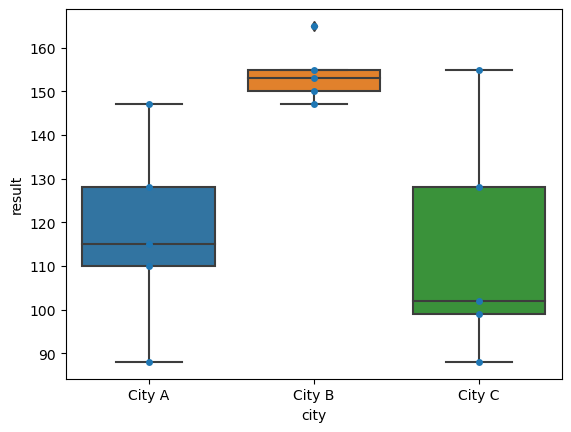

In [19]:
ax = sns.boxplot(x='city',y='result',data=iq_plot)
ax = sns.swarmplot(x='city',y='result',data=iq_plot)
plt.show()

귀무 가설: 모든 모집단의 평균이 모두 같다\
대립 가설: 모든 모집단의 평균이 서로 같은 것은 아니다

In [4]:
_, pvalue = stats.f_oneway(iq['City A'], iq['City B'], iq['City C'])
print(pvalue)

0.017452351669966726


P-value가 0.017 이므로 98%의 신뢰 수준에서 귀무 가설을 기각할 근거가 충분하다.
따라서 모든 모집단의 평균이 같은 것은 아니다.

HSD 검정을 통해 어떤 집단 때문에 평균이 다른지 알아볼 수 있다.

귀무 가설: 두 모집단의 평균이 서로 같다.\
대립 가설: 두 모집단의 평균이 서로 다르다.

In [5]:
hsd = stats.tukey_hsd(iq['City A'],iq['City B'],iq['City C'])
print(hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -36.400     0.039   -70.919    -1.881
 (0 - 2)      3.200     0.967   -31.319    37.719
 (1 - 0)     36.400     0.039     1.881    70.919
 (1 - 2)     39.600     0.025     5.081    74.119
 (2 - 0)     -3.200     0.967   -37.719    31.319
 (2 - 1)    -39.600     0.025   -74.119    -5.081



1-0, 1-2의 p-value가 0.05보다 작으므로 95%의 신뢰 수준에서 각 귀무 가설을 기각할 근거가 충분하다. \
따라서 모집단 City B의 평균이 나머지 모집단의 평균과 다르다. 

----
다른 도시에서 같은 방식으로 다섯 명씩 뽑아 IQ를 검사하였다.

세 도시의 IQ 평균이 서로 같은지 One-way ANOVA를 통해 알아보고, 첫 번째 조사 결과와 무엇이 다른지 서술하시오.

In [6]:
newiq = pd.DataFrame({'City A': [138, 167, 78, 80, 125], 'City B': [135, 168, 135, 167, 165], 'City C': [79, 122, 78, 155, 138]})
display(newiq)

,City A,City B,City C
0,138,135,79
1,167,168,122
2,78,135,78
3,80,167,155
4,125,165,138


In [21]:
newiq_plot = pd.melt(newiq.reset_index(),id_vars=['index'], value_vars=['City A','City B','City C'])
newiq_plot.columns = ['index','city','result']
display(newiq_plot)

,index,city,result
0,0,City A,138
1,1,City A,167
2,2,City A,78
3,3,City A,80
4,4,City A,125
5,0,City B,135
6,1,City B,168
7,2,City B,135
8,3,City B,167
9,4,City B,165


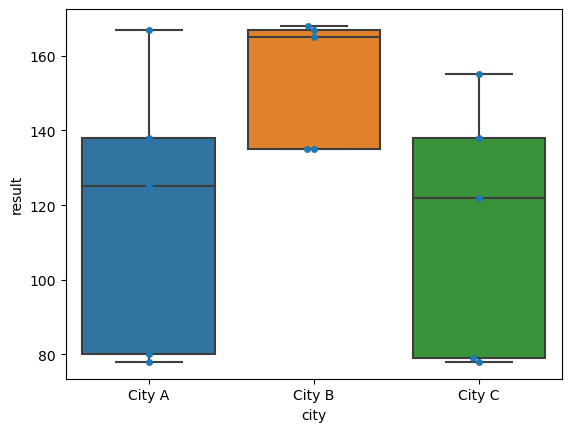

In [22]:
ax = sns.boxplot(x='city',y='result',data=newiq_plot)
ax = sns.swarmplot(x='city',y='result',data=newiq_plot)
plt.show()

귀무 가설: 모든 모집단의 평균이 모두 같다.\
대립 가설: 모든 모집단의 평균이 모두 같은 것은 아니다.

In [8]:
_, pvalue = stats.f_oneway(newiq['City A'], newiq['City B'], newiq['City C'])
print(pvalue)

0.1298945399905257


newiq 데이터의 p-value는 0.12로 0.05보다 크기 때문에 귀무 가설을 기각할 근거가 충분하지 않다. \
따라서 세 도시의 평균이 달랐던 iq 데이터와 다르게 newiq 데이터는 세 도시의 평균이 같다. 

----
이번에는 같은 도시에서 만 명씩 뽑아 IQ를 검사하였다.

세 도시의 IQ 평균이 서로 같은지 One-way ANOVA를 통해 알아보고, 두 번째 조사 결과와 무엇이 다른지 서술하시오.

In [9]:
cA = norm(117.6, 38.4).rvs(10000, 33)
cB = norm(154.0, 17.4).rvs(10000, 33)
cC = norm(114.4, 34.8).rvs(10000, 33)

moreiq = pd.DataFrame({'City A': cA, 'City B': cB, 'City C': cC})
display(moreiq)

,City A,City B,City C
0,105.356025,148.451949,103.303898
1,56.045547,126.108138,58.616277
2,58.647634,127.287209,60.974418
3,95.696606,144.075024,94.550049
4,109.277633,150.228928,106.857855
...,...,...,...
9995,114.539669,152.613288,111.626575
9996,97.425245,144.858314,96.116629
9997,89.364408,141.205748,88.811495
9998,101.453115,146.683443,99.766885


귀무 가설: 모든 모집단의 평균이 모두 같다.\
대립 가설: 모든 모집단의 평균이 모두 같은 것은 아니다.

In [10]:
_, pvalue = stats.f_oneway(moreiq['City A'], moreiq['City B'], moreiq['City C'])
print(pvalue)

0.0


p-value가 0이므로 귀무 가설을 기각할 근거가 충분하다.\
세 모집단의 평균이 같았던 두 번째 조사 결과와 다르게 세 모집단의 평균이 다르다는 것을 분명히 알 수 있다. 

## Two-way ANOVA

다음은 네 명의 환자에게 서로 다른 세 가지의 처치를 시행한 후 호전도를 측정한 결과이다. (단, 환자와 처치 간 연관성은 없다고 가정한다.)

환자 사이의 호전도 평균이 모두 같은지, 또 처치 사이의 호전도 평균이 모두 같은지 two-way ANOVA를 통해 알아보시오.

,Patient,Method 1,Method 2,Method 3
0,Patient 1,0.32,0.22,0.39
1,Patient 2,0.01,0.00,0.12
2,Patient 3,0.43,0.54,0.28
3,Patient 4,0.61,0.43,0.52


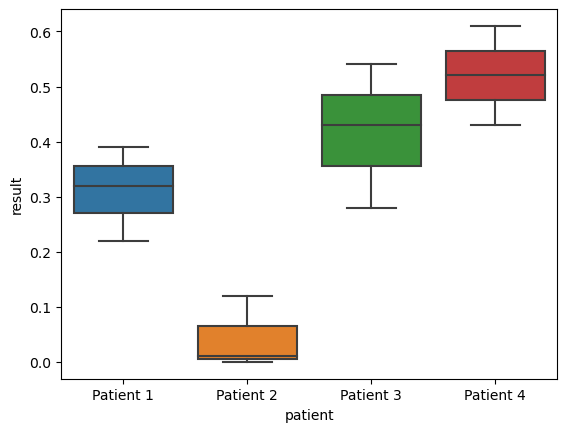

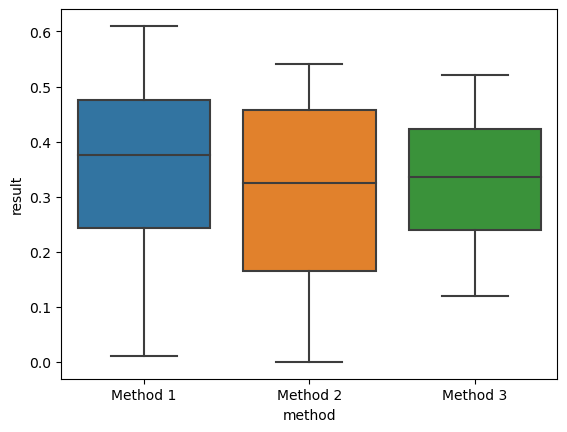

In [27]:
health = pd.DataFrame({'Patient': \
                       ['Patient 1', 'Patient 2', 'Patient 3', 'Patient 4'], 
                       'Method 1': [0.32, 0.01, 0.43, 0.61], 
                       'Method 2': [0.22, 0, 0.54, 0.43], 
                       'Method 3': [0.39, 0.12, 0.28, 0.52]})
display(health)

# melt -> plot
health_plot = pd.melt(health.reset_index(),id_vars=['Patient'],value_vars=['Method 1','Method 2','Method 3'])
health_plot.columns = ['patient','method','result']

sns.boxplot(x='patient',y='result',data=health_plot)
plt.show()
sns.boxplot(x='method',y='result',data=health_plot)
plt.show()

In [13]:
health = pd.melt(health, id_vars=['Patient'],value_vars=['Method 1','Method 2','Method 3'])
health.columns = ['patient','method','result']
display(health)

,patient,method,result
0,Patient 1,Method 1,0.32
1,Patient 2,Method 1,0.01
2,Patient 3,Method 1,0.43
3,Patient 4,Method 1,0.61
4,Patient 1,Method 2,0.22
5,Patient 2,Method 2,0.00
6,Patient 3,Method 2,0.54
7,Patient 4,Method 2,0.43
8,Patient 1,Method 3,0.39
9,Patient 2,Method 3,0.12


귀무 가설 1: 원인 'Patient'에 관하여 모든 모집단의 평균이 서로 같다.\
귀무 가설 1: 원인 'Patient'에 관하여 모든 모집단의 평균이 서로 같은 것은 아니다.

귀무 가설 2: 원인 'Method'에 관하여, 모든 모집단의 평균이 서로 같다.\
귀무 가설 2: 원인 'Method'에 관하여, 모든 모집단의 평균이 서로 같은 것은 아니다. 

In [14]:
model = ols('result ~ C(patient) + C(method)', data=health).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(patient),0.377892,3.0,10.869367,0.007716
C(method),0.004200,2.0,0.181208,0.838663
Residual,0.069533,6.0,NaN,NaN


원인 Patient: P-value가 0.008이므로 귀무 가설을 기각할 근거가 충분하다.\
원인 Method: P-value가 0.839이므로 귀무 가설을 기각할 근거가 충분하지 않다. 

-> 원인 Patient에 관해서는 모든 모집단의 평균이 같은 것은 아니다.\
-> 원인 Method에 관해서는 모든 모집단의 평균이 같다. 

# 질문
- ANOVA에서 p-value가 0이 나오면 모든 모집단의 평균이 서로서로 다르다는 뜻?